# Pattern statistics
---

In [24]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

## 1. # Patterns

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


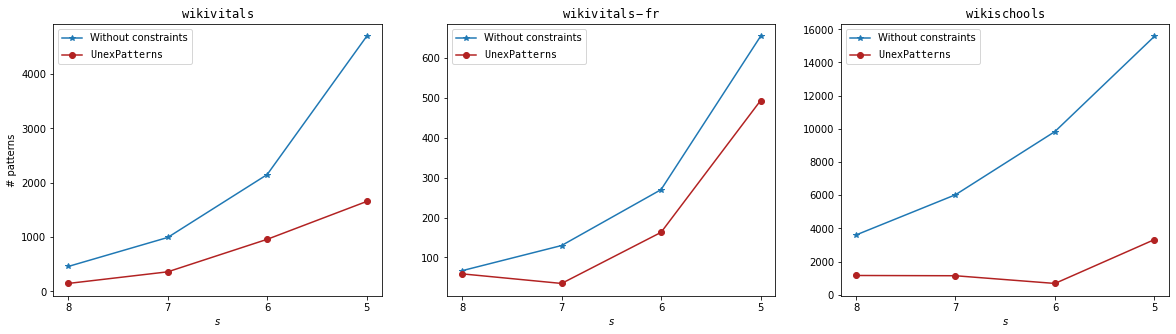

In [97]:
# Load data
datasets = ['wikivitals', 'wikivitals-fr', 'wikischools']
markers = ['*', 'o', '+', '^']
beta = 5
ss = [8, 7, 6, 5]
colors = ['#1f78b4', 'firebrick']
INPATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/result'

results_without_constraints = defaultdict(dict)
results_with_constraints = defaultdict(dict)
sid_dict = defaultdict(dict)
sid_dict_without_constraints = defaultdict(dict)

fig, ax = plt.subplots(1, len(datasets), figsize=(20, 5))

for i, d in enumerate(datasets):
    results_without_constraints[d] = defaultdict(list)
    results_with_constraints[d] = defaultdict(list)
    
    for s in ss:
            
        # Load patterns with all constraints
        with open(f'{INPATH}/with_prob/result_{d}_4_{s}_orderTrue_delta_0.bin', 'rb') as data:
            patterns_with_constraints = pickle.load(data)
        # Load patterns with all constraints
        with open(f'{INPATH}/without_constraints/result_{d}_4_{s}_orderTrue_delta_0.bin', 'rb') as data:
            patterns_without_constraints = pickle.load(data)
            
        results_without_constraints[d][beta].append(len(patterns_without_constraints))
        results_with_constraints[d][beta].append(len(patterns_with_constraints))
        
    ax[i].plot(results_without_constraints.get(d).get(beta), color=colors[0], marker=markers[0], label='Without constraints')
    ax[i].plot(results_with_constraints.get(d).get(beta), color=colors[1], marker=markers[1], label=r'$\tt{UnexPatterns}$')
    
    if i == 0:
        ax[i].set_ylabel('# patterns')
    ax[i].set_xlabel(r'$s$')
    ax[i].set_xticks(np.arange(0, 4), ['8', '7', '6', '5'])
    ax[i].set_title(rf'$\tt{d}$')
    ax[i].legend(loc=('upper left'))
    
SAVE_PATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/img'
plt.savefig(f'{SAVE_PATH}/nb_patterns_summary.eps', dpi=800, bbox_inches='tight')

#### With simplified algorithm

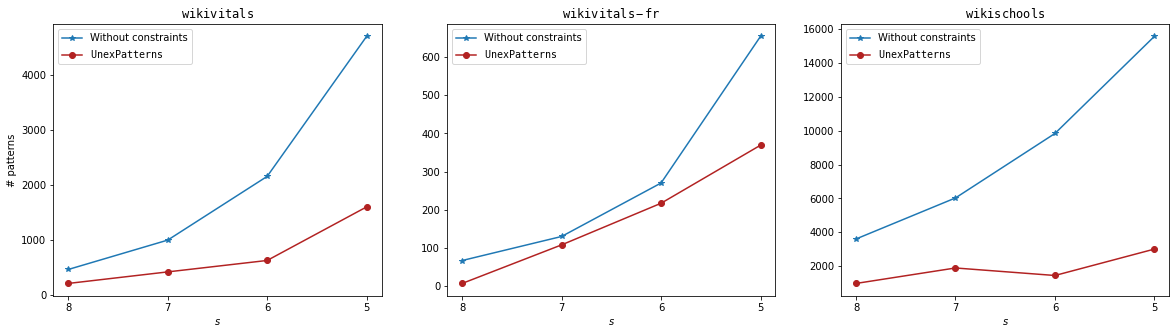

In [200]:
# Load data
datasets = ['wikivitals', 'wikivitals-fr', 'wikischools']
markers = ['*', 'o', '+', '^']
beta = 4
ss = [8, 7, 6, 5]
colors = ['#1f78b4', 'firebrick']
INPATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/result'

results_without_constraints = defaultdict(dict)
results_with_constraints = defaultdict(dict)
sid_dict = defaultdict(dict)
sid_dict_without_constraints = defaultdict(dict)

fig, ax = plt.subplots(1, len(datasets), figsize=(20, 5))

for i, d in enumerate(datasets):
    results_without_constraints[d] = defaultdict(list)
    results_with_constraints[d] = defaultdict(list)
    
    for s in ss:
            
        # Load patterns with all constraints
        with open(f'{INPATH}/with_prob/simpl_algo/result_{d}_{beta}_{s}_orderTrue_delta_0.bin', 'rb') as data:
            patterns_with_constraints = pickle.load(data)
        # Load patterns with all constraints
        with open(f'{INPATH}/without_constraints/result_{d}_{beta}_{s}_orderTrue_delta_0.bin', 'rb') as data:
            patterns_without_constraints = pickle.load(data)
            
        results_without_constraints[d][beta].append(len(patterns_without_constraints))
        results_with_constraints[d][beta].append(len(patterns_with_constraints))
        
    ax[i].plot(results_without_constraints.get(d).get(beta), color=colors[0], marker=markers[0], label='Without constraints')
    ax[i].plot(results_with_constraints.get(d).get(beta), color=colors[1], marker=markers[1], label=r'$\tt{UnexPatterns}$')
    
    if i == 0:
        ax[i].set_ylabel('# patterns')
    ax[i].set_xlabel(r'$s$')
    ax[i].set_xticks(np.arange(0, 4), ['8', '7', '6', '5'])
    ax[i].set_title(rf'$\tt{d}$')
    ax[i].legend(loc=('upper left'))
    
#SAVE_PATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/img'
#plt.savefig(f'{SAVE_PATH}/nb_patterns_summary.eps', dpi=800, bbox_inches='tight')

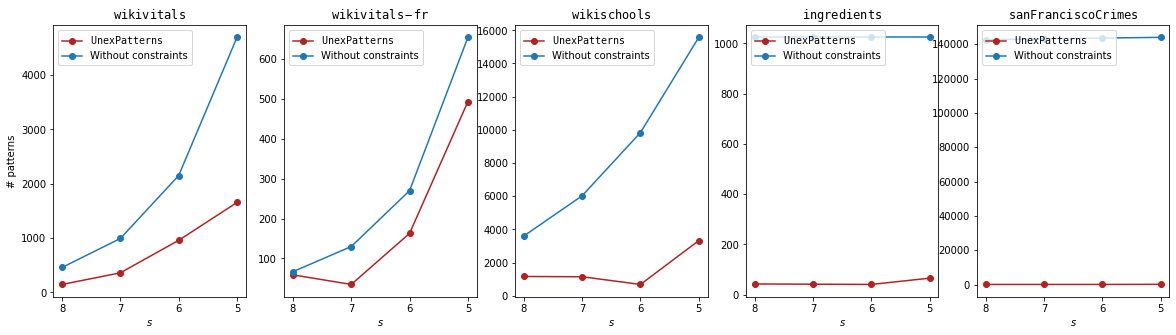

In [131]:
# Load data
datasets = ['wikivitals', 'wikivitals-fr', 'wikischools', 'ingredients', 'sanFranciscoCrimes']
markers = ['*', 'o', '+', '^']

ss = [8, 7, 6, 5]
colors = ['#1f78b4', 'firebrick']
INPATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/result'

results_without_constraints = defaultdict(dict)
results_with_constraints = defaultdict(dict)

fig, ax = plt.subplots(1, len(datasets), figsize=(20, 5))

for i, d in enumerate(datasets):
    if d == 'ingredients':
        beta = 1
    else:
        beta = 4
    results_without_constraints[d] = defaultdict(list)
    results_with_constraints[d] = defaultdict(list)
    
    for s in ss:
        
        with open(f'{INPATH}/with_prob/result_{d}_{beta}_{s}_orderTrue_delta_0.bin', 'rb') as data:
            patterns_with_constraints = pickle.load(data)
        with open(f'{INPATH}/without_constraints/result_{d}_{beta}_{s}_orderTrue_delta_0.bin', 'rb') as data:
            patterns_without_constraints = pickle.load(data)
            
        results_with_constraints[d][beta].append(len(patterns_with_constraints))
        results_without_constraints[d][beta].append(len(patterns_without_constraints))
        
    ax[i].plot(results_with_constraints.get(d).get(beta), color=colors[1], marker=markers[1], label=r'$\tt{UnexPatterns}$')
    ax[i].plot(results_without_constraints.get(d).get(beta), color=colors[0], marker=markers[1], label='Without constraints')
    if i == 0:
        ax[i].set_ylabel('# patterns')
    ax[i].set_xlabel(r'$s$')
    ax[i].set_xticks(np.arange(0, 4), ['8', '7', '6', '5'])
    ax[i].set_title(rf'$\tt{d}$')
    ax[i].legend(loc=('upper left'))


#### With simplified algo

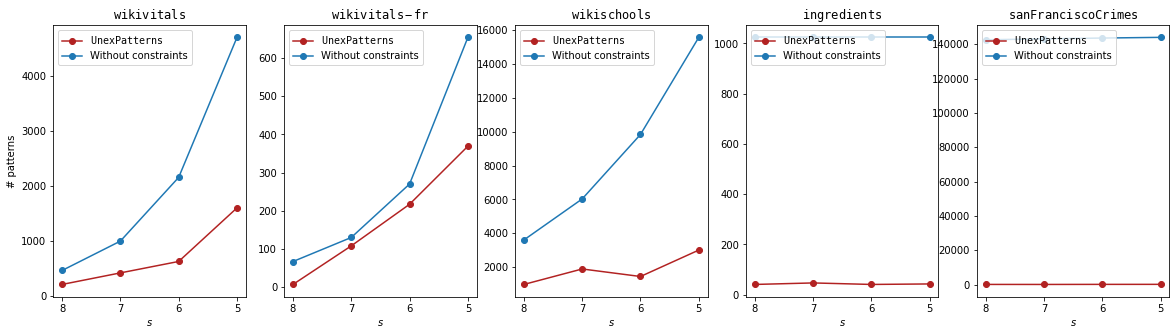

In [201]:
# Load data
datasets = ['wikivitals', 'wikivitals-fr', 'wikischools', 'ingredients', 'sanFranciscoCrimes']
markers = ['*', 'o', '+', '^']

ss = [8, 7, 6, 5]
colors = ['#1f78b4', 'firebrick']
INPATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/result'

results_without_constraints = defaultdict(dict)
results_with_constraints = defaultdict(dict)

fig, ax = plt.subplots(1, len(datasets), figsize=(20, 5))

for i, d in enumerate(datasets):
    if d == 'ingredients':
        beta = 1
    else:
        beta = 4
    results_without_constraints[d] = defaultdict(list)
    results_with_constraints[d] = defaultdict(list)
    
    for s in ss:
        
        with open(f'{INPATH}/with_prob/simpl_algo/result_{d}_{beta}_{s}_orderTrue_delta_0.bin', 'rb') as data:
            patterns_with_constraints = pickle.load(data)
        with open(f'{INPATH}/without_constraints/result_{d}_{beta}_{s}_orderTrue_delta_0.bin', 'rb') as data:
            patterns_without_constraints = pickle.load(data)
            
        results_with_constraints[d][beta].append(len(patterns_with_constraints))
        results_without_constraints[d][beta].append(len(patterns_without_constraints))
        
    ax[i].plot(results_with_constraints.get(d).get(beta), color=colors[1], marker=markers[1], label=r'$\tt{UnexPatterns}$')
    ax[i].plot(results_without_constraints.get(d).get(beta), color=colors[0], marker=markers[1], label='Without constraints')
    if i == 0:
        ax[i].set_ylabel('# patterns')
    ax[i].set_xlabel(r'$s$')
    ax[i].set_xticks(np.arange(0, 4), ['8', '7', '6', '5'])
    ax[i].set_title(rf'$\tt{d}$')
    ax[i].legend(loc=('upper left'))


In [202]:
# With simplified algo
results_with_constraints

defaultdict(dict,
            {'wikivitals': defaultdict(list, {4: [204, 414, 622, 1596]}),
             'wikivitals-fr': defaultdict(list, {4: [7, 108, 217, 369]}),
             'wikischools': defaultdict(list, {4: [978, 1892, 1448, 3008]}),
             'ingredients': defaultdict(list, {1: [41, 47, 41, 43]}),
             'sanFranciscoCrimes': defaultdict(list, {4: [67, 51, 95, 107]})})

In [132]:
results_with_constraints

defaultdict(dict,
            {'wikivitals': defaultdict(list, {4: [145, 359, 958, 1655]}),
             'wikivitals-fr': defaultdict(list, {4: [59, 35, 163, 493]}),
             'wikischools': defaultdict(list, {4: [1164, 1148, 684, 3326]}),
             'ingredients': defaultdict(list, {1: [43, 42, 41, 66]}),
             'sanFranciscoCrimes': defaultdict(list, {4: [83, 89, 91, 150]})})

In [124]:
results_without_constraints

defaultdict(dict,
            {'wikivitals': defaultdict(list, {4: [458, 992, 2151, 4697]}),
             'wikivitals-fr': defaultdict(list, {4: [67, 130, 270, 654]}),
             'wikischools': defaultdict(list, {4: [3605, 6029, 9838, 15575]}),
             'ingredients': defaultdict(list, {1: [1024, 1024, 1024, 1024]}),
             'sanFranciscoCrimes': defaultdict(list,
                         {4: [142611, 143159, 143627, 144027]})})

In [116]:
(359-992)/992

-0.6381048387096774

In [125]:
for d in datasets:
    end = np.asarray(list(results_with_constraints.get(d).values()))
    start = np.asarray(list(results_without_constraints.get(d).values()))
    diff = 100 * ((end - start) / start)
    print(f'{d}: {[np.round(x, 1) for x in diff]}')

wikivitals: [array([-68.3, -63.8, -55.5, -64.8])]
wikivitals-fr: [array([-11.9, -73.1, -39.6, -24.6])]
wikischools: [array([-67.7, -81. , -93. , -78.6])]
ingredients: [array([-95.8, -95.9, -96. , -93.6])]
sanFranciscoCrimes: [array([-99.9, -99.9, -99.9, -99.9])]


### With new attribute compressor

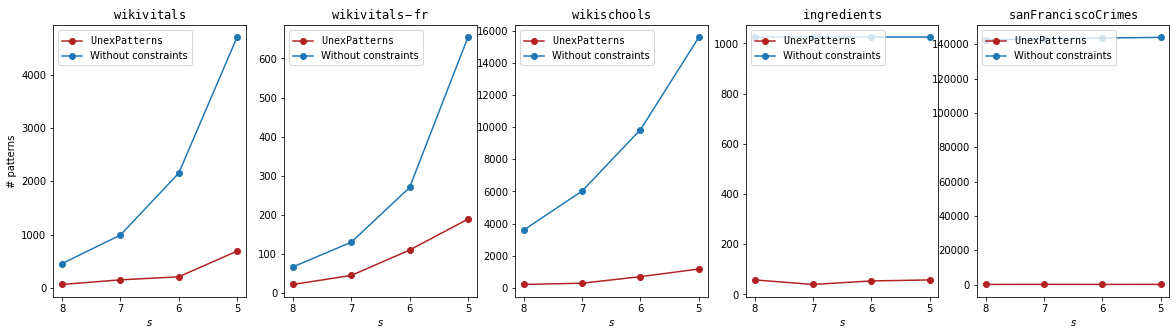

In [207]:
# Load data
datasets = ['wikivitals', 'wikivitals-fr', 'wikischools', 'ingredients', 'sanFranciscoCrimes']
markers = ['*', 'o', '+', '^']

ss = [8, 7, 6, 5]
colors = ['#1f78b4', 'firebrick']
INPATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/result'

results_without_constraints = defaultdict(dict)
results_with_constraints = defaultdict(dict)

fig, ax = plt.subplots(1, len(datasets), figsize=(20, 5))

for i, d in enumerate(datasets):
    if d == 'ingredients':
        beta = 1
    else:
        beta = 4
    results_without_constraints[d] = defaultdict(list)
    results_with_constraints[d] = defaultdict(list)
    
    for s in ss:
        
        with open(f'{INPATH}/with_prob/attr_compressor/result_{d}_{beta}_{s}_orderTrue_delta_0.bin', 'rb') as data:
            patterns_with_constraints = pickle.load(data)
        with open(f'{INPATH}/without_constraints/result_{d}_{beta}_{s}_orderTrue_delta_0.bin', 'rb') as data:
            patterns_without_constraints = pickle.load(data)
            
        results_with_constraints[d][beta].append(len(patterns_with_constraints))
        results_without_constraints[d][beta].append(len(patterns_without_constraints))
        
    ax[i].plot(results_with_constraints.get(d).get(beta), color=colors[1], marker=markers[1], label=r'$\tt{UnexPatterns}$')
    ax[i].plot(results_without_constraints.get(d).get(beta), color=colors[0], marker=markers[1], label='Without constraints')
    if i == 0:
        ax[i].set_ylabel('# patterns')
    ax[i].set_xlabel(r'$s$')
    ax[i].set_xticks(np.arange(0, 4), ['8', '7', '6', '5'])
    ax[i].set_title(rf'$\tt{d}$')
    ax[i].legend(loc=('upper left'))

In [208]:
results_with_constraints

defaultdict(dict,
            {'wikivitals': defaultdict(list, {4: [67, 153, 210, 691]}),
             'wikivitals-fr': defaultdict(list, {4: [22, 45, 110, 189]}),
             'wikischools': defaultdict(list, {4: [218, 296, 702, 1177]}),
             'ingredients': defaultdict(list, {1: [58, 40, 54, 58]}),
             'sanFranciscoCrimes': defaultdict(list,
                         {4: [85, 145, 100, 135]})})

## 2. Computation time

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


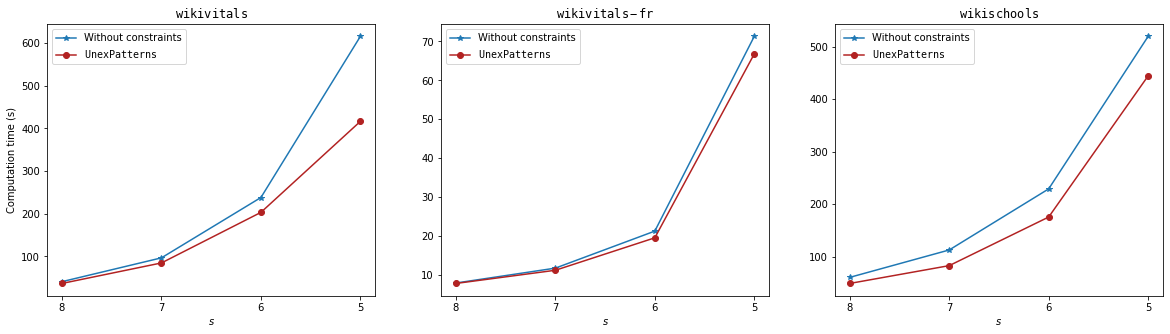

In [39]:
# Parameters
datasets = ['wikivitals', 'wikivitals-fr', 'wikischools']
betas = [5]
ss = [8, 7, 6, 5]
INPATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/log'
colors = ['#1f78b4', 'firebrick']
          
cp_time_without_constraints = defaultdict(dict)
cp_time_with_constraints = defaultdict(dict)

fig, ax = plt.subplots(1, len(datasets), figsize=(20, 5))

# Extract execution time from logs
for i, d in enumerate(datasets):
    cp_time_without_constraints[d] = defaultdict(list)
    cp_time_with_constraints[d] = defaultdict(list)
    for b in betas:
        for s in ss:
           
            with open(f'{INPATH}/without_u/max_support_inf/log_{d}_{beta}_{s}_orderTrue') as f:
                lines = f.readlines()
                for l in lines:
                    if 'Total time:' in l:
                        time = float(l.split(' ')[2])
                        cp_time_without_constraints[d][beta].append(float(time))
                        
            with open(f'{INPATH}/max_support_inf/log_{d}_{beta}_{s}_orderTrue') as f:
                lines = f.readlines()
                for l in lines:
                    if 'Total time:' in l:
                        time = float(l.split(' ')[2])
                        cp_time_with_constraints[d][beta].append(float(time))
                        
    ax[i].plot(cp_time_without_constraints.get(d).get(beta), color=colors[0], marker=markers[0], label='Without constraints')
    ax[i].plot(cp_time_with_constraints.get(d).get(beta), color=colors[1], marker=markers[1], label=r'$\tt{UnexPatterns}$')
    if i == 0:
        ax[i].set_ylabel('Computation time (s)')
    ax[i].set_xlabel(r'$s$')
    ax[i].set_xticks(np.arange(0, 4), ['8', '7', '6', '5'])
    ax[i].set_title(rf'$\tt{d}$')
    ax[i].legend(loc=('upper left'))

SAVE_PATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/img'
plt.savefig(f'{SAVE_PATH}/computation_times_summary.eps', dpi=800, bbox_inches='tight')

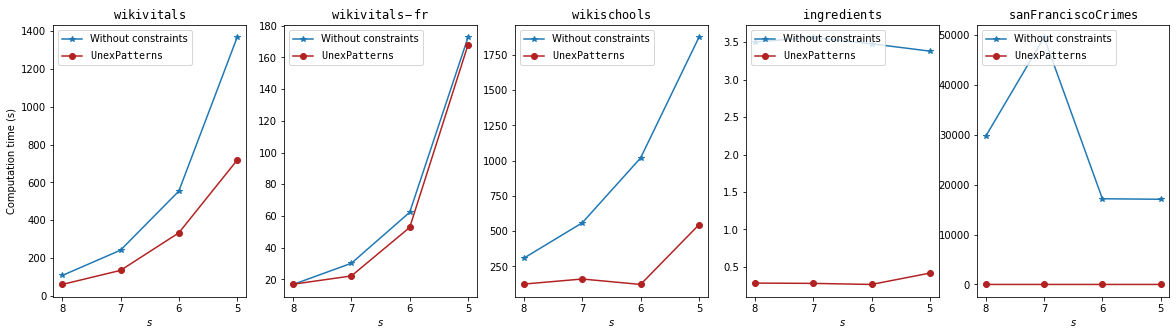

In [145]:
# Parameters
datasets = ['wikivitals', 'wikivitals-fr', 'wikischools',  'ingredients', 'sanFranciscoCrimes']

ss = [8, 7, 6, 5]
INPATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output'
colors = ['#1f78b4', 'firebrick']
          
cp_time_without_constraints = defaultdict(dict)
cp_time_with_constraints = defaultdict(dict)

fig, ax = plt.subplots(1, len(datasets), figsize=(20, 5))

# Extract execution time from logs
for i, d in enumerate(datasets):
    if d == 'ingredients':
        beta = 1
    else:
        beta = 4
    cp_time_without_constraints[d] = defaultdict(list)
    cp_time_with_constraints[d] = defaultdict(list)

    for s in ss:

        with open(f'{INPATH}/result/without_constraints/log_{d}_{beta}_{s}_orderTrue_delta_0') as f:
            lines = f.readlines()
            for l in lines:
                if 'Total time:' in l:
                    time = float(l.split(' ')[2])
                    cp_time_without_constraints[d][beta].append(float(time))

        with open(f'{INPATH}/result/with_prob/log_{d}_{beta}_{s}_orderTrue_delta_0') as f:
            lines = f.readlines()
            for l in lines:
                if 'Total time:' in l:
                    time = float(l.split(' ')[2])
                    cp_time_with_constraints[d][beta].append(float(time))
                        
    ax[i].plot(cp_time_without_constraints.get(d).get(beta), color=colors[0], marker=markers[0], label='Without constraints')
    ax[i].plot(cp_time_with_constraints.get(d).get(beta), color=colors[1], marker=markers[1], label=r'$\tt{UnexPatterns}$')
    if i == 0:
        ax[i].set_ylabel('Computation time (s)')
    ax[i].set_xlabel(r'$s$')
    ax[i].set_xticks(np.arange(0, 4), ['8', '7', '6', '5'])
    ax[i].set_title(rf'$\tt{d}$')
    ax[i].legend(loc=('upper left'))

#SAVE_PATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/img'
#plt.savefig(f'{SAVE_PATH}/computation_times_summary.eps', dpi=800, bbox_inches='tight')

#### With simplified algo

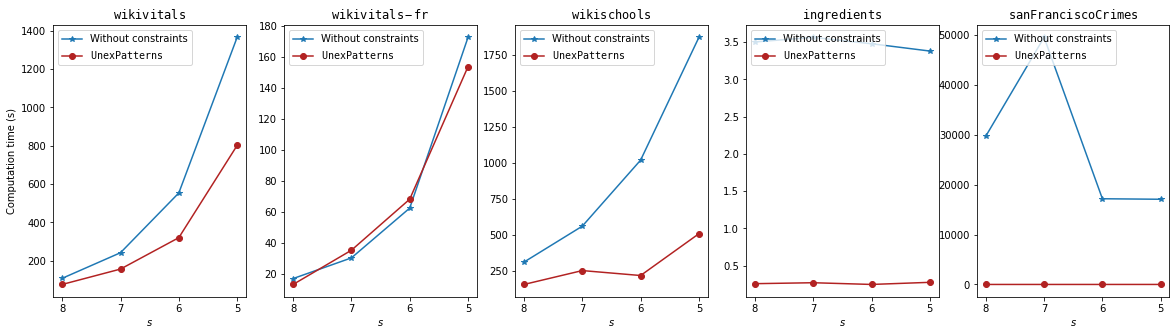

In [203]:
# Parameters
datasets = ['wikivitals', 'wikivitals-fr', 'wikischools',  'ingredients', 'sanFranciscoCrimes']

ss = [8, 7, 6, 5]
INPATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output'
colors = ['#1f78b4', 'firebrick']
          
cp_time_without_constraints = defaultdict(dict)
cp_time_with_constraints = defaultdict(dict)

fig, ax = plt.subplots(1, len(datasets), figsize=(20, 5))

# Extract execution time from logs
for i, d in enumerate(datasets):
    if d == 'ingredients':
        beta = 1
    else:
        beta = 4
    cp_time_without_constraints[d] = defaultdict(list)
    cp_time_with_constraints[d] = defaultdict(list)

    for s in ss:

        with open(f'{INPATH}/result/without_constraints/log_{d}_{beta}_{s}_orderTrue_delta_0') as f:
            lines = f.readlines()
            for l in lines:
                if 'Total time:' in l:
                    time = float(l.split(' ')[2])
                    cp_time_without_constraints[d][beta].append(float(time))

        with open(f'{INPATH}/result/with_prob/simpl_algo/log_{d}_{beta}_{s}_orderTrue_delta_0') as f:
            lines = f.readlines()
            for l in lines:
                if 'Total time:' in l:
                    time = float(l.split(' ')[2])
                    cp_time_with_constraints[d][beta].append(float(time))
                        
    ax[i].plot(cp_time_without_constraints.get(d).get(beta), color=colors[0], marker=markers[0], label='Without constraints')
    ax[i].plot(cp_time_with_constraints.get(d).get(beta), color=colors[1], marker=markers[1], label=r'$\tt{UnexPatterns}$')
    if i == 0:
        ax[i].set_ylabel('Computation time (s)')
    ax[i].set_xlabel(r'$s$')
    ax[i].set_xticks(np.arange(0, 4), ['8', '7', '6', '5'])
    ax[i].set_title(rf'$\tt{d}$')
    ax[i].legend(loc=('upper left'))

#SAVE_PATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/img'
#plt.savefig(f'{SAVE_PATH}/computation_times_summary.eps', dpi=800, bbox_inches='tight')

In [204]:
cp_time_with_constraints

defaultdict(dict,
            {'wikivitals': defaultdict(list,
                         {4: [76.0649, 156.329, 320.282, 801.661]}),
             'wikivitals-fr': defaultdict(list,
                         {4: [13.008, 35.0986, 68.0691, 153.681]}),
             'wikischools': defaultdict(list,
                         {4: [153.718, 250.32, 215.921, 507.099]}),
             'ingredients': defaultdict(list,
                         {1: [0.257106, 0.269775, 0.246754, 0.275183]}),
             'sanFranciscoCrimes': defaultdict(list,
                         {4: [0.639138, 0.580657, 0.811762, 1.185]})})

In [146]:
cp_time_with_constraints

defaultdict(dict,
            {'wikivitals': defaultdict(list,
                         {4: [60.8186, 135.051, 333.238, 717.191]}),
             'wikivitals-fr': defaultdict(list,
                         {4: [16.9477, 22.1632, 52.756, 167.897]}),
             'wikischools': defaultdict(list,
                         {4: [125.218, 160.887, 122.398, 545.487]}),
             'ingredients': defaultdict(list,
                         {1: [0.283086, 0.279104, 0.264994, 0.416341]}),
             'sanFranciscoCrimes': defaultdict(list,
                         {4: [0.781362, 0.850797, 0.787666, 1.31189]})})

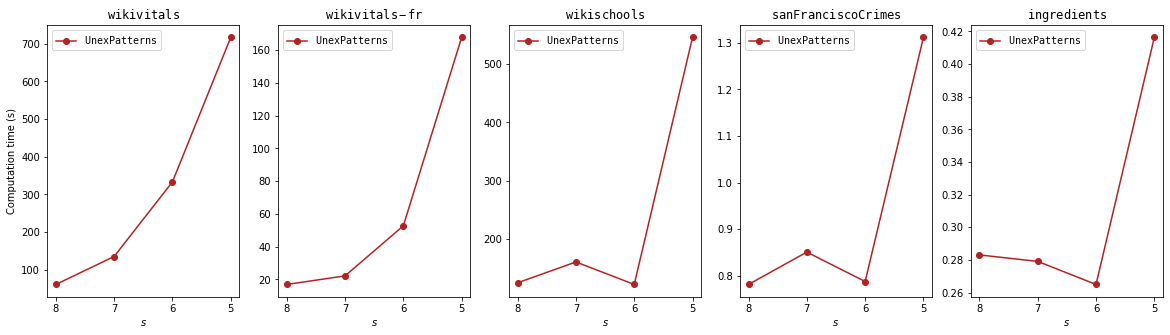

In [88]:
# Parameters
datasets = ['wikivitals', 'wikivitals-fr', 'wikischools', 'sanFranciscoCrimes', 'ingredients']

ss = [8, 7, 6, 5]
INPATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/result/with_prob'
colors = ['#1f78b4', 'firebrick']
          
cp_time_with_constraints = defaultdict(dict)

fig, ax = plt.subplots(1, len(datasets), figsize=(20, 5))

# Extract execution time from logs
for i, d in enumerate(datasets):
    if d == 'ingredients':
        beta = 1
    else:
        beta = 4
    cp_time_with_constraints[d] = defaultdict(list)
   
    for s in ss:
        if d not in ['ingredients', 'sanFranciscoCrimes']:
            with open(f'{INPATH}/log_{d}_{beta}_{s}_orderTrue_delta_0') as f:
                lines = f.readlines()
                for l in lines:
                    if 'Total time:' in l:
                        time = float(l.split(' ')[2])
                        cp_time_with_constraints[d][beta].append(float(time))
        else:
            with open(f'{INPATH}/log_{d}_{beta}_{s}_orderTrue_delta_0') as f:
                lines = f.readlines()
                for l in lines:
                    if 'Total time:' in l:
                        time = float(l.split(' ')[2])
                        cp_time_with_constraints[d][beta].append(float(time))

                        
    ax[i].plot(cp_time_with_constraints.get(d).get(beta), color=colors[1], marker=markers[1], label=r'$\tt{UnexPatterns}$')
    if i == 0:
        ax[i].set_ylabel('Computation time (s)')
    ax[i].set_xlabel(r'$s$')
    ax[i].set_xticks(np.arange(0, 4), ['8', '7', '6', '5'])
    ax[i].set_title(rf'$\tt{d}$')
    ax[i].legend(loc=('upper left'))


In [89]:
cp_time_with_constraints

defaultdict(dict,
            {'wikivitals': defaultdict(list,
                         {4: [60.8186, 135.051, 333.238, 717.191]}),
             'wikivitals-fr': defaultdict(list,
                         {4: [16.9477, 22.1632, 52.756, 167.897]}),
             'wikischools': defaultdict(list,
                         {4: [125.218, 160.887, 122.398, 545.487]}),
             'sanFranciscoCrimes': defaultdict(list,
                         {4: [0.781362, 0.850797, 0.787666, 1.31189]}),
             'ingredients': defaultdict(list,
                         {1: [0.283086, 0.279104, 0.264994, 0.416341]})})

In [42]:
def cum_cov_rate(patterns):
    nb_nodes = len(patterns[0][0]) 
    current_nodes = set()
    cum_nodes = []
    for p in patterns:
        if len(p[1]) > 0:
            current_nodes |= set(p[0])
            cum_nodes.append(len(current_nodes))
            
    cum_cover_rate = np.array(cum_nodes) / nb_nodes
    return cum_cover_rate

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


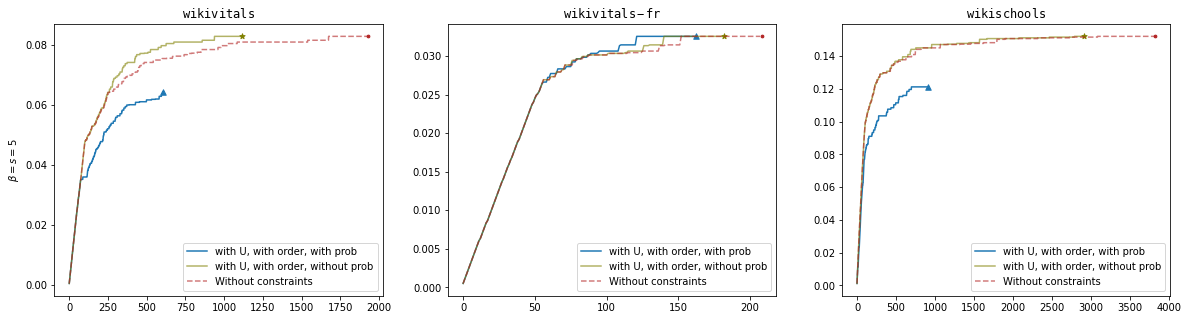

In [54]:
colors = ['olivedrab', 'lightgreen', 'limegreen', 'firebrick', 'steelblue']
datasets = ['wikivitals', 'wikivitals-fr', 'wikischools']
betas = [7]
ss = [7]
ks = [5] # k is used when beta=s
cover_rates = defaultdict()

fig, ax = plt.subplots(len(ks), len(datasets), figsize=(20, 5))

for i, k in enumerate(ks):
    for d, dataset in enumerate(datasets):
        max_y = 0
        cover_rates[dataset] = defaultdict(dict)
        #for i, b in enumerate(betas):
            #for k, s in enumerate(ss):

        with open(f"../../output/result/result_{dataset}_{k}_{k}_orderTrue.bin", "rb") as data:
            old = pickle.load(data)
        with open(f"../../output/result/result_{dataset}_{k}_{k}_orderFalse.bin", "rb") as data:
            old_2 = pickle.load(data)
        with open(f"../../output/result/without_u/max_support_inf/result_{dataset}_{k}_{k}_orderTrue_without_constraint.bin", "rb") as data:
            res_without_u = pickle.load(data)
        with open(f"../../output/result/without_u/max_support_inf/result_{dataset}_{k}_{k}_orderFalse.bin", "rb") as data:
            res_without_u_no_ord = pickle.load(data)
        with open(f"../../result_{dataset}_{k}_{k}_orderTrue_prob.bin", "rb") as data:
            new = pickle.load(data)

        # Cumulated cover rates
        cover_without = cum_cov_rate(old)
        cover_without_ord = cum_cov_rate(old_2)
        cover_without_u = cum_cov_rate(res_without_u)
        cover_without_u_no_ord = cum_cov_rate(res_without_u_no_ord)
        cover_with = cum_cov_rate(new)

        ax[d].plot(cover_with, label='with U, with order, with prob', color='#1f78b4')
        ax[d].plot(cover_without, label='with U, with order, without prob', color='olive', alpha=0.6)
        #ax[d].plot(cover_without_ord, label='with U, without order, without prob', color=colors[2], alpha=0.6)
        ax[d].plot(cover_without_u, label='Without constraints', color=colors[3], linestyle='--', alpha=0.6)
        #ax[d].plot(cover_without_u_no_ord, label='without U, without order, without prob', linestyle='--', color=colors[4])

        ax[d].scatter(len(cover_with), cover_with[-1], s=30, marker='^', color='#1f78b4')
        ax[d].scatter(len(cover_without), cover_without[-1], s=30, marker='*', color='olive')
        #ax[d].scatter(len(cover_without_ord), cover_without_ord[-1], s=30, marker='^', color=colors[2])
        ax[d].scatter(len(cover_without_u), cover_without_u[-1], s=30, marker='.', color=colors[3])
        #ax[d].scatter(len(cover_without_u_no_ord), cover_without_u_no_ord[-1], s=30, marker='.', color=colors[4])

        ax[d].legend(loc='lower right')
        if d == 0:
            ax[d].set_ylabel(rf'$\beta=s={k}$')
        if i == 0:
            ax[d].set_title(rf'$\tt{dataset}$')
            
# Save image
plt.savefig('../../output/img/cumulated_coverage.eps', dpi=800, bbox_inches='tight')

In [67]:
import gensim

p = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/models'
def load_gensim_model(inpath, name):
    model = gensim.models.Doc2Vec.load(f'{inpath}/{name}.model')
    return model

dataset = 'wikischools'
mymodel = load_gensim_model(p, f'gensim_model_{dataset}')
print(mymodel.vector_size)

15


## Algo modified. 

Instead of comparing sizes of extent, we compare the exact nodes in extents.

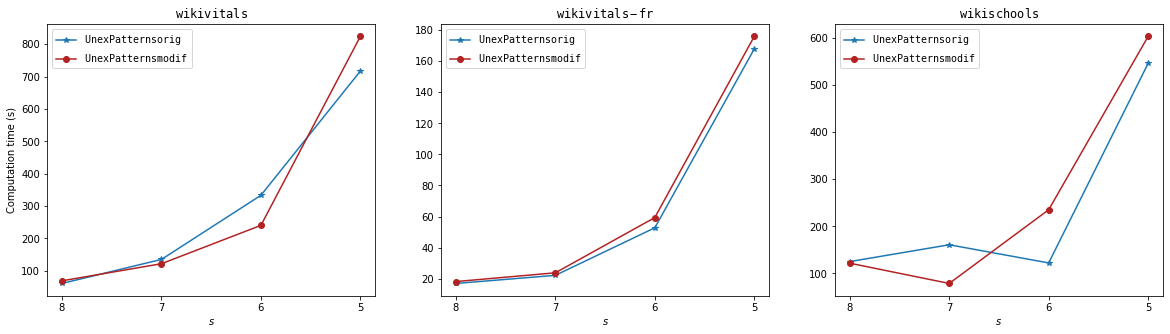

In [128]:
# Parameters
datasets = ['wikivitals', 'wikivitals-fr', 'wikischools']
betas = [4]
ss = [8, 7, 6, 5]
INPATH_ORIG = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/result/with_prob'
INPATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/experiments/Algo_modified'
colors = ['#1f78b4', 'firebrick']
          
cp_time_with_constraints_orig = defaultdict(dict)
cp_time_with_constraints = defaultdict(dict)

fig, ax = plt.subplots(1, len(datasets), figsize=(20, 5))

# Extract execution time from logs
for i, d in enumerate(datasets):
    cp_time_with_constraints_orig[d] = defaultdict(list)
    cp_time_with_constraints[d] = defaultdict(list)
    for b in betas:
        for s in ss:
                       
            with open(f'{INPATH_ORIG}/log_{d}_{beta}_{s}_orderTrue_delta_0') as f:
                lines = f.readlines()
                for l in lines:
                    if 'Total time:' in l:
                        time = float(l.split(' ')[2])
                        cp_time_with_constraints_orig[d][beta].append(float(time))
                        
            with open(f'{INPATH}/log_{d}_{beta}_{s}_orderTrue_delta_0') as f:
                lines = f.readlines()
                for l in lines:
                    if 'Total time:' in l:
                        time = float(l.split(' ')[2])
                        cp_time_with_constraints[d][beta].append(float(time))
                        
    ax[i].plot(cp_time_with_constraints_orig.get(d).get(beta), color=colors[0], marker=markers[0], label=r'$\tt{UnexPatterns} orig$')
    ax[i].plot(cp_time_with_constraints.get(d).get(beta), color=colors[1], marker=markers[1], label=r'$\tt{UnexPatterns} modif$')
    if i == 0:
        ax[i].set_ylabel('Computation time (s)')
    ax[i].set_xlabel(r'$s$')
    ax[i].set_xticks(np.arange(0, 4), ['8', '7', '6', '5'])
    ax[i].set_title(rf'$\tt{d}$')
    ax[i].legend(loc=('upper left'))

## Scatter plot # patterns / computation time

In [133]:
cp_time_with_constraints

defaultdict(dict,
            {'wikivitals': defaultdict(list,
                         {4: [60.8186, 135.051, 333.238, 717.191]}),
             'wikivitals-fr': defaultdict(list,
                         {4: [16.9477, 22.1632, 52.756, 167.897]}),
             'wikischools': defaultdict(list,
                         {4: [125.218, 160.887, 122.398, 545.487]}),
             'ingredients': defaultdict(list,
                         {4: [0.017406, 0.017159, 0.017074, 0.01695]}),
             'sanFranciscoCrimes': defaultdict(list,
                         {4: [0.781362, 0.850797, 0.787666, 1.31189]})})

In [134]:
results_with_constraints

defaultdict(dict,
            {'wikivitals': defaultdict(list, {4: [145, 359, 958, 1655]}),
             'wikivitals-fr': defaultdict(list, {4: [59, 35, 163, 493]}),
             'wikischools': defaultdict(list, {4: [1164, 1148, 684, 3326]}),
             'ingredients': defaultdict(list, {1: [43, 42, 41, 66]}),
             'sanFranciscoCrimes': defaultdict(list, {4: [83, 89, 91, 150]})})

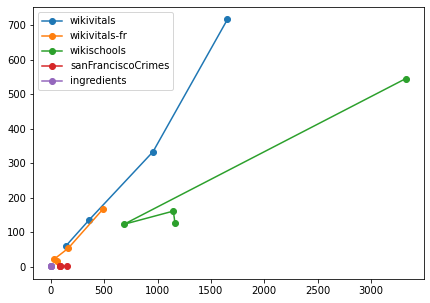

In [163]:
datasets = datasets = ['wikivitals', 'wikivitals-fr', 'wikischools', 'sanFranciscoCrimes', 'ingredients']
ss = [8, 7, 6, 5]
INPATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/result'
results_with_constraints = defaultdict(dict)
cp_time_with_constraints = defaultdict(dict)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
for i, d in enumerate(datasets):
    results_with_constraints[d] = defaultdict(list)
    cp_time_with_constraints[d] = defaultdict(list)
    if d=='ingredients':
        beta = 1
    else:
        beta = 4
        
    for s in ss:
        with open(f'{INPATH}/with_prob/result_{d}_4_{s}_orderTrue_delta_0.bin', 'rb') as data:
            patterns_with_constraints = pickle.load(data)
        results_with_constraints[d][beta].append(len(patterns_with_constraints))
        
        with open(f'{INPATH}/with_prob/log_{d}_{beta}_{s}_orderTrue_delta_0') as f:
            lines = f.readlines()
            for l in lines:
                if 'Total time:' in l:
                    time = float(l.split(' ')[2])
                    cp_time_with_constraints[d][beta].append(float(time))
        
    X = [results_with_constraints.get(d).get(beta)[j] for j, _ in enumerate(ss)]
    Y = [cp_time_with_constraints.get(d).get(beta)[j] for j, _ in enumerate(ss)]
    
    ax.plot(X, Y, marker='o', label=d)
plt.legend();

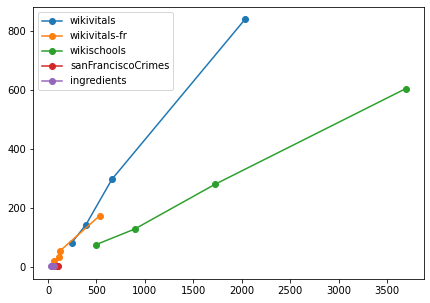

In [177]:
datasets = datasets = ['wikivitals', 'wikivitals-fr', 'wikischools', 'sanFranciscoCrimes', 'ingredients']
ss = [8, 7, 6, 5]
INPATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/result/with_prob/old'
PATH_WITHOUT_CONST = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/result'
results_with_constraints = defaultdict(dict)
results_without_constraints = defaultdict(dict)
cp_time_with_constraints = defaultdict(dict)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
for i, d in enumerate(datasets):
    results_with_constraints[d] = defaultdict(list)
    results_without_constraints[d] = defaultdict(list)
    cp_time_with_constraints[d] = defaultdict(list)
    if d == 'ingredients':
        beta = 1
    else:
        beta = 4
        
    for s in ss:
        with open(f'{INPATH}/result_{d}_{beta}_{s}_orderTrue_delta_0.bin', 'rb') as data:
            patterns_with_constraints = pickle.load(data)
        results_with_constraints[d][beta].append(len(patterns_with_constraints))
        
        with open(f'{PATH_WITHOUT_CONST}/without_constraints/result_{d}_{beta}_{s}_orderTrue_delta_0.bin', 'rb') as data:
            patterns_without_constraints = pickle.load(data)
        results_without_constraints[d][beta].append(len(patterns_without_constraints))
        
        with open(f'{INPATH}/log_{d}_{beta}_{s}_orderTrue_delta_0') as f:
            lines = f.readlines()
            for l in lines:
                if 'Total time:' in l:
                    time = float(l.split(' ')[2])
                    cp_time_with_constraints[d][beta].append(float(time))
        
    X = [results_with_constraints.get(d).get(beta)[j] for j, _ in enumerate(ss)]
    Y = [cp_time_with_constraints.get(d).get(beta)[j] for j, _ in enumerate(ss)]
    
    ax.plot(X, Y, marker='o', label=d)
plt.legend();

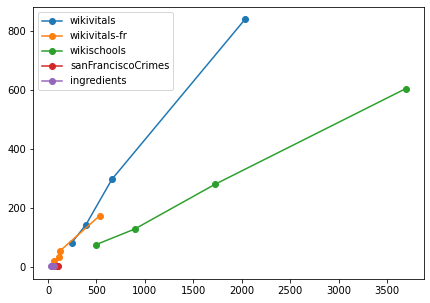

In [197]:
datasets = datasets = ['wikivitals', 'wikivitals-fr', 'wikischools', 'sanFranciscoCrimes', 'ingredients']
ss = [8, 7, 6, 5]
INPATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/result/with_prob/final'
PATH_WITHOUT_CONST = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/result'
results_with_constraints = defaultdict(dict)
results_without_constraints = defaultdict(dict)
cp_time_with_constraints = defaultdict(dict)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
for i, d in enumerate(datasets):
    results_with_constraints[d] = defaultdict(list)
    results_without_constraints[d] = defaultdict(list)
    cp_time_with_constraints[d] = defaultdict(list)
    if d == 'ingredients':
        beta = 1
    else:
        beta = 4
        
    for s in ss:
        with open(f'{INPATH}/result_{d}_{beta}_{s}_orderTrue_delta_0.bin', 'rb') as data:
            patterns_with_constraints = pickle.load(data)
        results_with_constraints[d][beta].append(len(patterns_with_constraints))
        
        with open(f'{PATH_WITHOUT_CONST}/without_constraints/result_{d}_{beta}_{s}_orderTrue_delta_0.bin', 'rb') as data:
            patterns_without_constraints = pickle.load(data)
        results_without_constraints[d][beta].append(len(patterns_without_constraints))
        
        with open(f'{INPATH}/log_{d}_{beta}_{s}_orderTrue_delta_0') as f:
            lines = f.readlines()
            for l in lines:
                if 'Total time:' in l:
                    time = float(l.split(' ')[2])
                    cp_time_with_constraints[d][beta].append(float(time))
        
    X = [results_with_constraints.get(d).get(beta)[j] for j, _ in enumerate(ss)]
    Y = [cp_time_with_constraints.get(d).get(beta)[j] for j, _ in enumerate(ss)]
    
    ax.plot(X, Y, marker='o', label=d)
plt.legend();

In [198]:
results_without_constraints

defaultdict(dict,
            {'wikivitals': defaultdict(list, {4: [458, 992, 2151, 4697]}),
             'wikivitals-fr': defaultdict(list, {4: [67, 130, 270, 654]}),
             'wikischools': defaultdict(list, {4: [3605, 6029, 9838, 15575]}),
             'sanFranciscoCrimes': defaultdict(list,
                         {4: [142611, 143159, 143627, 144027]}),
             'ingredients': defaultdict(list, {1: [1024, 1024, 1024, 1024]})})

In [199]:
results_with_constraints

defaultdict(dict,
            {'wikivitals': defaultdict(list, {4: [246, 391, 660, 2034]}),
             'wikivitals-fr': defaultdict(list, {4: [62, 112, 122, 534]}),
             'wikischools': defaultdict(list, {4: [496, 895, 1727, 3696]}),
             'sanFranciscoCrimes': defaultdict(list, {4: [51, 88, 102, 92]}),
             'ingredients': defaultdict(list, {1: [42, 29, 59, 43]})})

In [193]:
cp_time_without_constraints

defaultdict(dict,
            {'wikivitals': defaultdict(list,
                         {4: [108.115, 241.699, 553.644, 1365.94]}),
             'wikivitals-fr': defaultdict(list,
                         {4: [16.8009, 30.1553, 62.3086, 172.607]}),
             'wikischools': defaultdict(list,
                         {4: [309.443, 559.671, 1019.6, 1874.76]}),
             'ingredients': defaultdict(list,
                         {1: [3.50357, 3.56529, 3.47945, 3.38136]}),
             'sanFranciscoCrimes': defaultdict(list,
                         {4: [29707.2, 49504.5, 17169.4, 17066.4]})})

In [178]:
results_with_constraints

defaultdict(dict,
            {'wikivitals': defaultdict(list, {4: [246, 391, 660, 2034]}),
             'wikivitals-fr': defaultdict(list, {4: [62, 112, 122, 534]}),
             'wikischools': defaultdict(list, {4: [496, 895, 1727, 3696]}),
             'sanFranciscoCrimes': defaultdict(list, {4: [51, 88, 102, 92]}),
             'ingredients': defaultdict(list, {1: [42, 29, 59, 43]})})

In [179]:
for d in datasets:
    end = np.asarray(list(results_with_constraints.get(d).values()))
    start = np.asarray(list(results_without_constraints.get(d).values()))
    diff = 100 * ((end - start) / start)
    print(f'{d}: {[np.round(x, 1) for x in diff]}')

wikivitals: [array([-46.3, -60.6, -69.3, -56.7])]
wikivitals-fr: [array([ -7.5, -13.8, -54.8, -18.3])]
wikischools: [array([-86.2, -85.2, -82.4, -76.3])]
sanFranciscoCrimes: [array([-100. ,  -99.9,  -99.9,  -99.9])]
ingredients: [array([-95.9, -97.2, -94.2, -95.8])]


In [180]:
cp_time_with_constraints

defaultdict(dict,
            {'wikivitals': defaultdict(list,
                         {4: [81.3313, 141.473, 295.965, 838.476]}),
             'wikivitals-fr': defaultdict(list,
                         {4: [17.8359, 31.7559, 52.3191, 172.407]}),
             'wikischools': defaultdict(list,
                         {4: [74.206, 127.106, 279.281, 603.695]}),
             'sanFranciscoCrimes': defaultdict(list,
                         {4: [0.535647, 0.785821, 0.95979, 0.941678]}),
             'ingredients': defaultdict(list,
                         {1: [0.259545, 0.192681, 0.367764, 0.243295]})})

### New attribute compressor

In [ ]:
datasets = datasets = ['wikivitals', 'wikivitals-fr', 'wikischools', 'sanFranciscoCrimes', 'ingredients']
ss = [8, 7, 6, 5]
INPATH = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/result/with_prob/attr_compressor'
PATH_WITHOUT_CONST = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/result'
results_with_constraints = defaultdict(dict)
results_without_constraints = defaultdict(dict)
cp_time_with_constraints = defaultdict(dict)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
for i, d in enumerate(datasets):
    results_with_constraints[d] = defaultdict(list)
    results_without_constraints[d] = defaultdict(list)
    cp_time_with_constraints[d] = defaultdict(list)
    if d == 'ingredients':
        beta = 1
    else:
        beta = 4
        
    for s in ss:
        with open(f'{INPATH}/result_{d}_{beta}_{s}_orderTrue_delta_0.bin', 'rb') as data:
            patterns_with_constraints = pickle.load(data)
        results_with_constraints[d][beta].append(len(patterns_with_constraints))
        
        with open(f'{PATH_WITHOUT_CONST}/without_constraints/result_{d}_{beta}_{s}_orderTrue_delta_0.bin', 'rb') as data:
            patterns_without_constraints = pickle.load(data)
        results_without_constraints[d][beta].append(len(patterns_without_constraints))
        
        with open(f'{INPATH}/log_{d}_{beta}_{s}_orderTrue_delta_0') as f:
            lines = f.readlines()
            for l in lines:
                if 'Total time:' in l:
                    time = float(l.split(' ')[2])
                    cp_time_with_constraints[d][beta].append(float(time))
        
    X = [results_with_constraints.get(d).get(beta)[j] for j, _ in enumerate(ss)]
    Y = [cp_time_with_constraints.get(d).get(beta)[j] for j, _ in enumerate(ss)]
    
    ax.plot(X, Y, marker='o', label=d)
plt.legend();

## Run Excess with different time budget. 

For each value of $s$ we select the time budget according to the computation time of UnexPatterns algorithm.

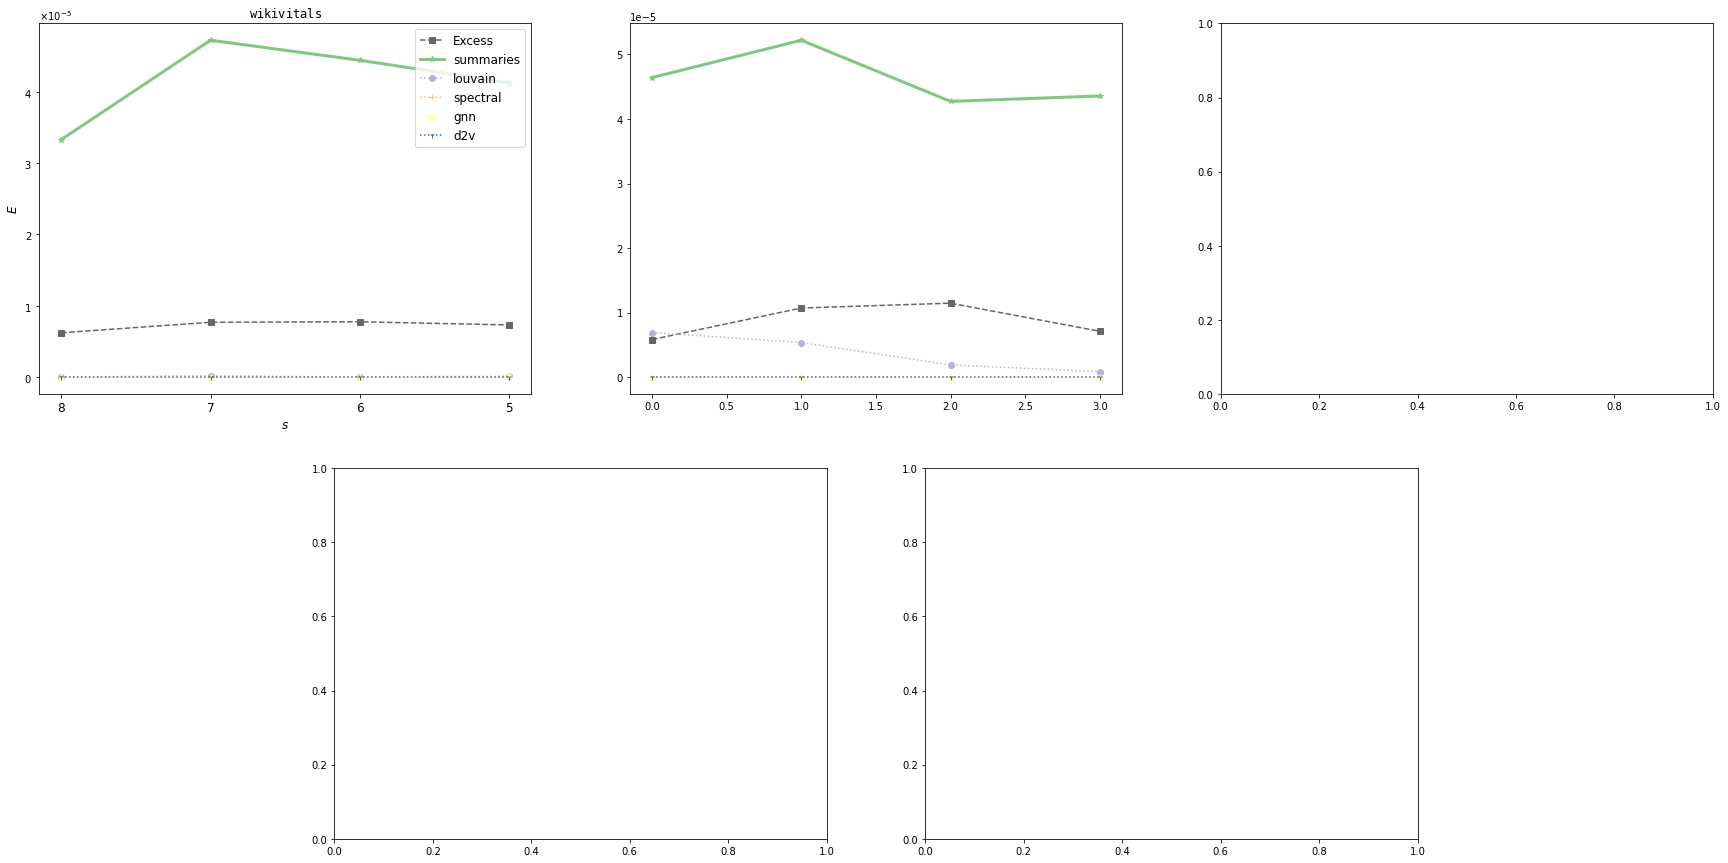

In [189]:
import matplotlib.gridspec as gridspec
from matplotlib import ticker

def clip(val):
    if val == 0:
        return 1e-8
    else:
        return val

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
    
fig = plt.figure(figsize=(30, 15)) 
gs = gridspec.GridSpec(2, 6)
gs.update(wspace=0.5)
ax1 = plt.subplot(gs[0, :2], )
ax2 = plt.subplot(gs[0, 2:4])
ax3 = plt.subplot(gs[0, 4:])
ax4 = plt.subplot(gs[1, 1:3])
ax5 = plt.subplot(gs[1, 3:5])

all_inf = defaultdict(list)
inpath = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/output/result'
expath = '/Users/simondelarue/Documents/PhD/Research/Co-Meg/CoMEG/experiments'
datasets = ['wikivitals', 'wikivitals-fr']
methods = ['summaries', 'louvain', 'spectral', 'gnn', 'd2v']
#colors = ['blue', 'orange', 'red', 'green', 'black', 'yellow', 'brown']
colors = [plt.cm.Accent(x) for x in range(10)]
markers = ['*', 'o', '+', '^', '1', '2', 's', 'p']

for i, d in enumerate(datasets):
    all_inf[d] = defaultdict(list)
    if d == 'sanFranciscoCrimes':
        gamma = 0.2
    elif d == 'ingredients':
        gamma = 0.05
    else:
        gamma = 0.8
        
    if d == 'ingredients':
        beta = 1
    else:
        beta = 4
        
    for s in ss:        
        # Excess results
        with open(f'{expath}/Excess/results/{d}/new/information_details_{d}_5_{s}_{gamma}_excess.txt', 'r') as data:
            info_excess_raw = data.readlines()
        vals = list(map(float, info_excess_raw[0].split(', ')))
        all_inf[d]['excess'].append(clip(vals[3]))
        
        # Cenergetics results
        if d == 'sanFranciscoCrimes':
            with open(f'{expath}/Cenergetics/results/{d}/information_details_{d}_5_{s}_{gamma}_cenergetics.txt', 'r') as data:
                info_cenergetics_raw = data.readlines()
            vals = list(map(float, info_cenergetics_raw[0].split(', ')))
            all_inf[d]['cenergetics'].append(clip(vals[3]))
        
        # Unex patterns + baselines
        for m in methods:
            if m in ['gnn', 'louvain'] and d == 'ingredients':
                pass
            elif not (m == 'gnn' and d=='sanFranciscoCrimes'):
                with open(f'{inpath}/with_prob/final/information_details_{d}_{beta}_{s}_{m}_{gamma}_new_conc_new2.txt', 'r') as data: # Here is the modification
                    info = data.readlines()
                vals = list(map(float, info[0].split(', ')))
                all_inf[d][m].append(clip(vals[3]))

    if d in ['sanFranciscoCrimes']:
        ax4.plot(np.arange(0, 4), all_inf[d]['excess'], label='Excess', color=colors[-2], marker=markers[-2], linestyle='dashed')
        ax4.plot(np.arange(0, 4), all_inf[d]['cenergetics'], label='Cenergetics', color=colors[-1], marker=markers[-1], linestyle='dashed')
    elif d in ['ingredients']:
        ax5.plot(np.arange(0, 4), all_inf[d]['excess'], label='Excess', color=colors[-2], marker=markers[-2], linestyle='dashed')
    elif d == 'wikivitals':
        ax1.plot(np.arange(0, 4), all_inf[d]['excess'], label='Excess', color=colors[-2], marker=markers[-2], linestyle='dashed')
    elif d == 'wikivitals-fr':
        ax2.plot(np.arange(0, 4), all_inf[d]['excess'], label='Excess', color=colors[-2], marker=markers[-2], linestyle='dashed')
    elif d == 'wikischools':
        ax3.plot(np.arange(0, 4), all_inf[d]['excess'], label='Excess', color=colors[-2], marker=markers[-2], linestyle='dashed')
    
    for j, m in enumerate(methods):
        if m in ['gnn', 'louvain'] and d == 'ingredients':
            pass
        elif not (m == 'gnn' and d=='sanFranciscoCrimes'):
            if m == 'summaries':
                if d in ['sanFranciscoCrimes']:
                    ax4.plot(np.arange(0, 4), all_inf[d][m], label=m, marker=markers[j], color=colors[j], linewidth=3)
                elif d in ['ingredients']:
                    ax5.plot(np.arange(0, 4), all_inf[d][m], label=m, marker=markers[j], color=colors[j], linewidth=3)
                elif d == 'wikivitals':
                    ax1.plot(np.arange(0, 4), all_inf[d][m], label=m, marker=markers[j], color=colors[j], linewidth=3)
                elif d == 'wikivitals-fr':
                    ax2.plot(np.arange(0, 4), all_inf[d][m], label=m, marker=markers[j], color=colors[j], linewidth=3)
                elif d == 'wikischools':
                    ax3.plot(np.arange(0, 4), all_inf[d][m], label=m, marker=markers[j], color=colors[j], linewidth=3)
            else:
                if d in ['sanFranciscoCrimes']:
                    ax4.plot(np.arange(0, 4), all_inf[d][m], label=m, marker=markers[j], color=colors[j], linestyle='dotted')
                elif d in ['ingredients']:
                    ax5.plot(np.arange(0, 4), all_inf[d][m], label=m, marker=markers[j], color=colors[j], linestyle='dotted')
                elif d == 'wikivitals':
                    ax1.plot(np.arange(0, 4), all_inf[d][m], label=m, marker=markers[j], color=colors[j], linestyle='dotted')
                elif d == 'wikivitals-fr':
                    ax2.plot(np.arange(0, 4), all_inf[d][m], label=m, marker=markers[j], color=colors[j], linestyle='dotted')
                elif d == 'wikischools':
                    ax3.plot(np.arange(0, 4), all_inf[d][m], label=m, marker=markers[j], color=colors[j], linestyle='dotted')
axes = [ax1, ax2, ax3, ax4, ax5]
for i, ax in enumerate(axes[:1]):
    ax.legend(loc='upper right', fontsize=12);
    ax.set_xticks(np.arange(0, 4), ss, fontsize=12)
    ax.set_xlabel(r'$s$', fontsize=12)
    ax.set_ylabel(rf'$E$', fontsize=12)
    ax.yaxis.set_major_formatter(formatter) 
    ax.set_title(rf'$\tt{datasets[i]}$', fontsize=12)